The purpose of this notebook is show a proof of concept for a decision tree. This excersize will mainly be used to understand how to use scikit learn's code.

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

In [2]:
data_raw = pd.read_csv('../data/train.csv', header=0)

# Feature engineering

In [3]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
catagorical_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
numerical_features = ['Age', 'Fare']
df = data_raw[features]
y = data_raw[target]

Check the number of nulls and handle these columns.

In [4]:
len(df) - df.count()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Drop null in embarked since there are only two.  Also drop the rows in the target vector.

In [5]:
df_free = df.dropna(subset=['Embarked'])
only_na = df[~df.index.isin(df_free.index)]
df = df_free

In [6]:
y = y.drop(only_na.index)

Impute age using the median age.

In [7]:
imp = preprocessing.Imputer(missing_values='NaN', strategy='median', axis=0)
df[numerical_features] = imp.fit_transform(df[numerical_features])

Check that all nulls have been removed.

In [8]:
len(df) - df.count()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Now that the nulls are dropped or imputed, transform catagorical data into numerical labels.

In [9]:
df[catagorical_features] = df[catagorical_features].apply(preprocessing.LabelEncoder().fit_transform)

# Fit the model

In [10]:
X = df
model = tree.DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [11]:
scores = cross_val_score(model, X, y, cv=10)

In [12]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.79 (+/- 0.09)


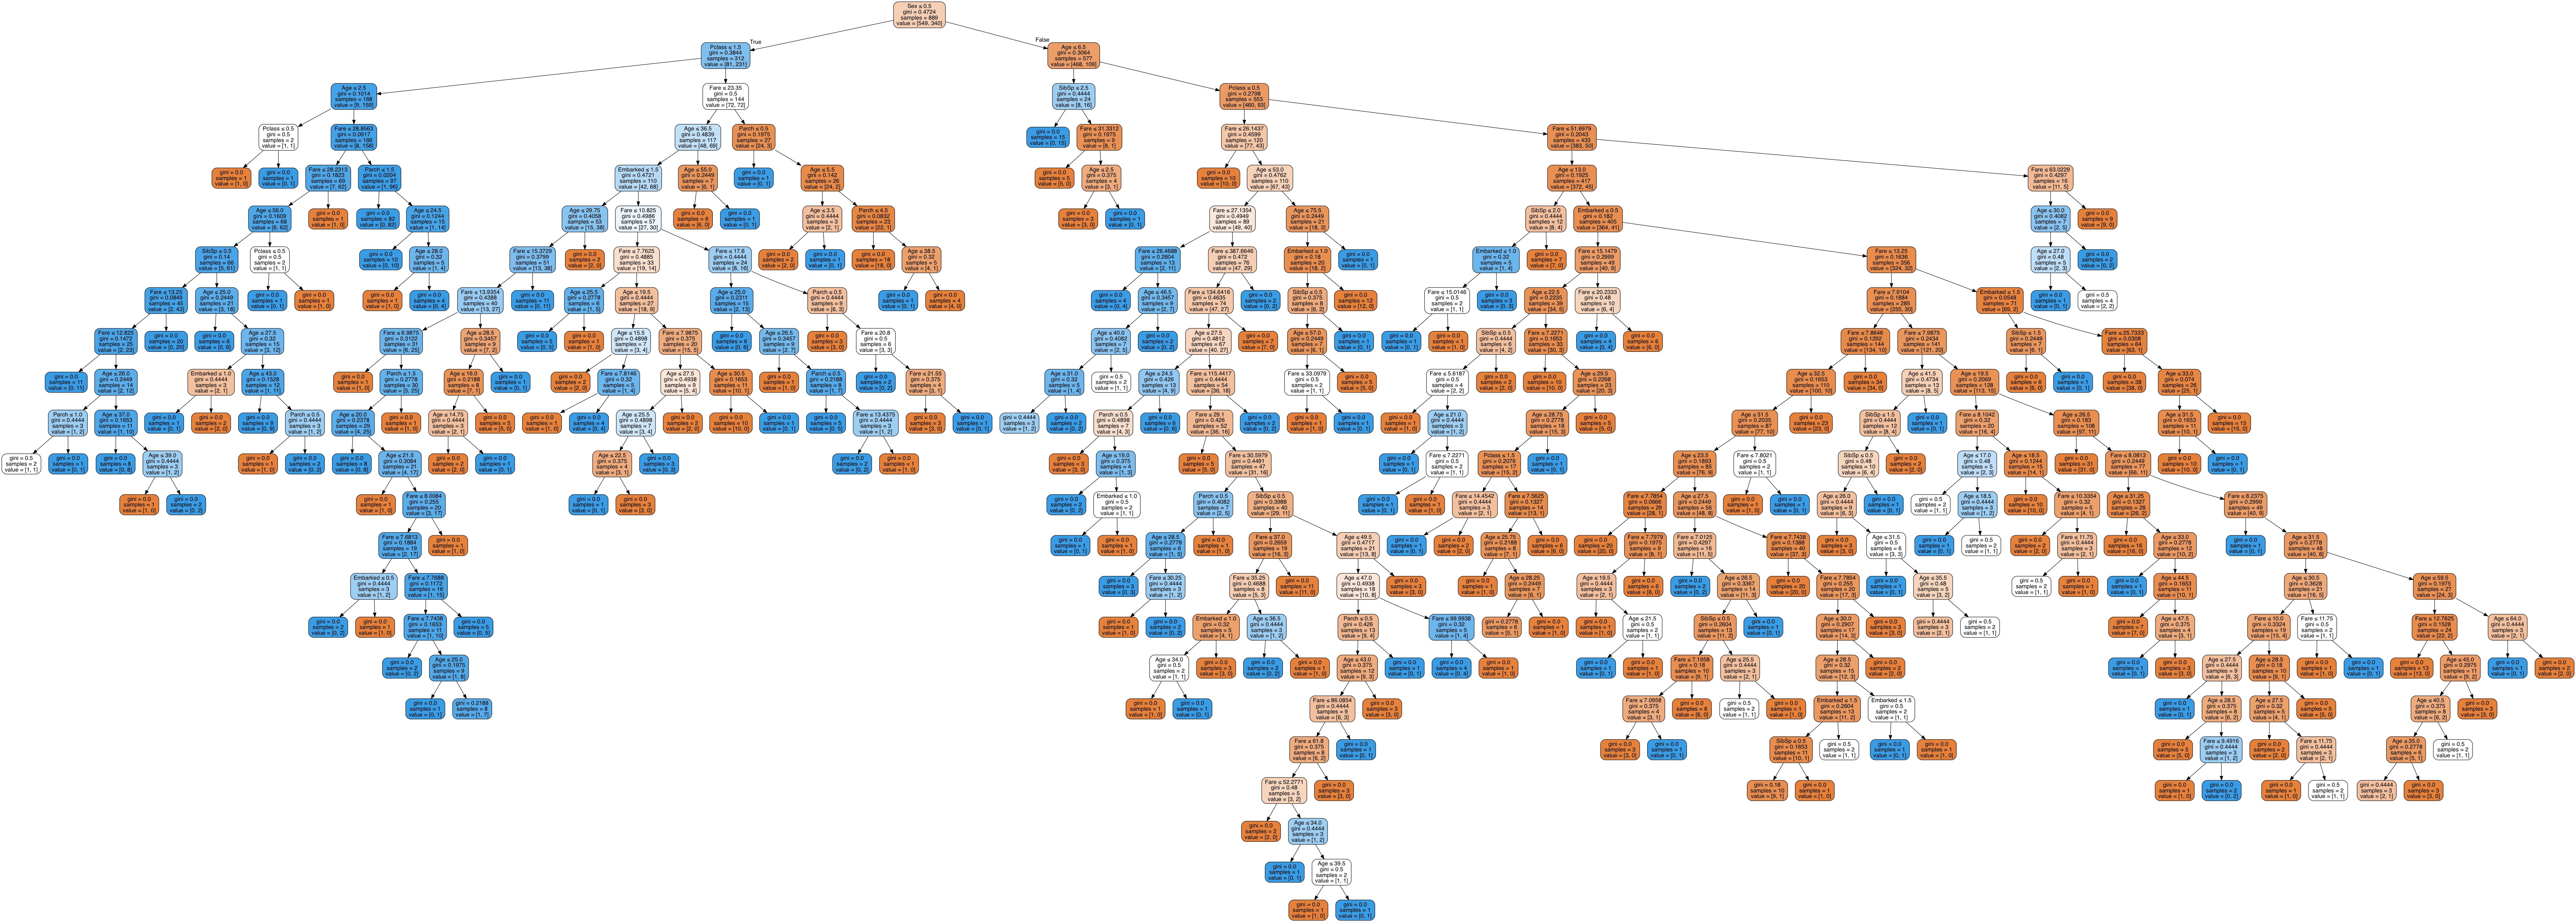

In [17]:
from IPython.display import Image
import pydotplus
dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=features,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png()) 

In [16]:
dot_data = tree.export_graphviz(model, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("tree.pdf") 

True